<h2> Neural Network Music Generation

**INTRO *Evan

<h4> Recurrent Neural Networks vs. General Adversarial Networks

Below we present two deep learning methods for generating music: *Recurrent Neural Networks* (RNN) and *General Adversarial Networks* (GAN). We will explore the basic concepts of RNN and GNN to generate music. <br> <br>
But before we begin, we will import some helpul packages and tools to accomplish these tasks. 

In [3]:
import os
import collections
import datetime
import glob
import numpy as np
import pathlib
import pandas as pd
from typing import Dict, List, Optional, Sequence, Tuple

#MIIDI file processing tools
import pretty_midi
import seaborn as sns
import fluidsynth

#Neural Network Tools
import tensorflow as tf
from keras.preprocessing import image
from keras.applications.xception import preprocess_input, decode_predictions
import tensorflow.keras as keras
import tensorflow.keras.backend as K
from keras.utils.vis_utils import model_to_dot

#Plotting Tools
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
from keras.utils.vis_utils import plot_model

<h3> Recurrent Neural Network (RNN)

- explain what the RNN is trying to do (how it works) (Louis)
                - BRIEF intro to RNN structure
                        - example midi file played
                        - explain wHAT we are trying to do (i.e the losses we are trying to minimize
                                                                                        (pitch/step/duration)
                - load up the trained model
                - show the structure of the trained model
                - generate a new song with the model

<h3> General Adversarial Neural Network (GAN)

To create a General Adversarial Neural Network, we will first create 2 different networks and combine them into one. We will contruct: a **generator** and a **discriminator**. <br><br>
The *generator* is designed to take random noise (an array of random values from -1 to 1) and try to generate an appropriate image. The *discriminator* is trained on both the real and fake (generated) images and trys to discriminate between the two. <br><br> When we combine the models, the networks will be forced to trade-off loss on one another. So, when the discriminator becomes good at determining between real and fake images, the generator is forced to make more real-looking images. When the generator makes better-looking images, the discriminator must learn to make more careful decisions. 

In [5]:
#tools for NN and image processing
from keras.preprocessing import image
from keras.applications.xception import preprocess_input, decode_predictions
import tensorflow.keras as keras
import tensorflow.keras.backend as K
from keras.utils.vis_utils import model_to_dot
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline
from IPython.display import display
from keras.utils.vis_utils import plot_model

<h5> Midi Images

To be able to generate music with images, we first have to transform our training music (midi files) to images! To do this, we use the helper functions found [here](https://github.com/mathigatti/midi2img).  <br><br>
Using the python script midi2img.py, we converted midi files into a 106 X 106 image, where the **each row represents a note** (from 21 (A0) to 127 (G9)) and **each column represents the timestep of the song** (1/4 beat per pixel). <br><br>
To understand this more clearly, let's load up some example images...

In [7]:
def grab_image(img_path):
    img = image.load_img(img_path, color_mode="grayscale", target_size=(106,106))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

In [14]:
#read in midi images
exampleImages = np.concatenate([grab_image('./example_midi_images/%s'%(filename)) for filename in os.listdir("./example_midi_images/") if filename.endswith(".png")])

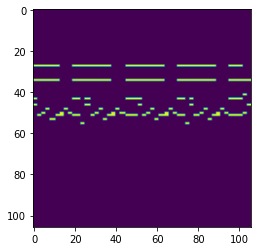

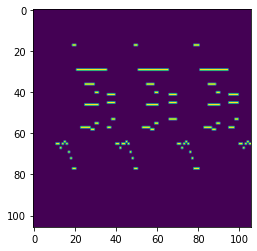

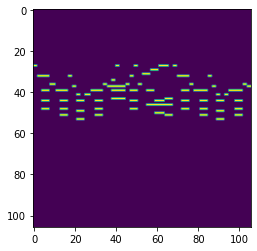

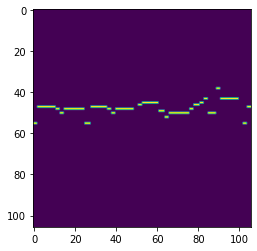

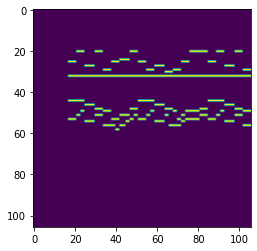

In [19]:
for i in range(len(exampleImages)):
    plt.imshow(image.array_to_img(exampleImages[i,:,:,:]))
    plt.show()

In [ ]:
#still working

- explain what the GAN is trying to do (how it works) 
                        - BRIEF intro to GAN structure (Emily)
                        - link the git hub to generate iamges from midis (Emily)
                        - show an example training image (or multiple) (Emily)
                        - explain WHAT we are trying to do with the GAN (Emily)
                - load up the trained model (Jason)
                - show the structure of the trained model (Jason)
                - generate a new image with the model (Jason) 